In [3]:
import numpy as np 

import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten, Conv2D,Dropout,AveragePooling2D,MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


11501568/11490434 [==============================] - 0s 0us/step


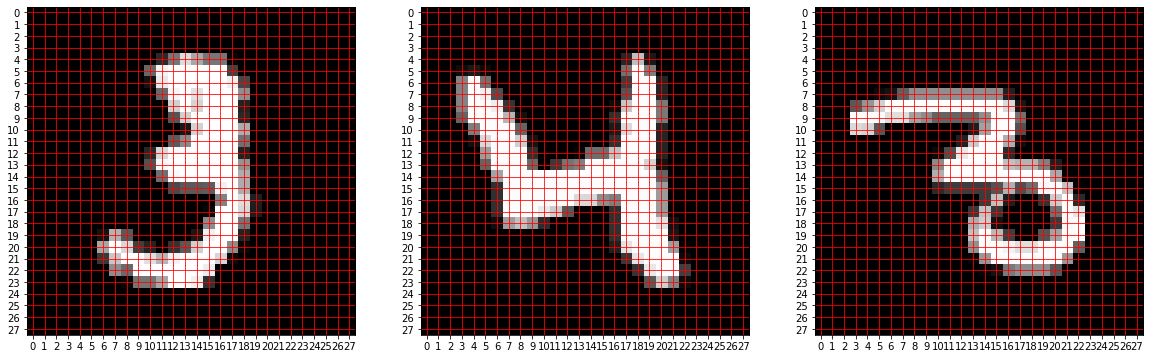

In [ ]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:]

import matplotlib.pyplot as plt
ii=10
f,ax=plt.subplots(1,3,figsize=(20,8))

for i,ii in enumerate([10,20,30]): 


  ax[i].imshow(x_train[ii,...].reshape(28,28),cmap='gray')
  ax[i].grid(visible=True,which='both',color='r')
  ax[i].set_xticks(np.arange(28))
  ax[i].set_yticks(np.arange(28))


The size of each image is 28*28, Howeveer we can observe that maximum number of feature and feature transitions like edge, lines_segments, cross-features are bounded within sub-grids of max 3*3

The distinctive patterns are only a few in number, that means that not each grid or collection of grids has some different property. A similar kind of pattern is repeated across various 2-D combinations across the entire image 

The patterns of the features are repeated across the grid-space and thus we can make use of this consistent-repetitive behaviour by utilizing some convolution layers in our network.

There are 10 distict kind of elements present in this image repository.
Cross, edges (both in x and y) directions and some slliptical curves should be enough to determine primary characteristics of each image.

However these images may be shifted, translated and thus there would be some difference in orientation on primary characteristic features.

I will consider this all while preparing my network for predicting this dataset

Each convolution map used in the first layer will be 3*3 in size and I will also use relu activation function for accentuating the patterns that are determined by the conv2d maps

In [ ]:
# Within Convolution layers the weights and the bias layers of the conv map are the parameters that get trained, The original image_array gets convolved, slightly compressed and passed on for further 
#processing, 
# Making use of thie fact that the output has been convolved with 2d maps we can use pooling transformation apply it on the convolved output and store the statistic for a particular grid-size
# In my case I will use a smaller window of 2*2 (smaler than 3*3) and use average statistic to pool each convolved maps

#Next I will try to create convolution maps for these pre-convolved features in order to determine some features that are cross of simple convolution maps, curvilinear corners that are meeting points of 2-d eliptical edges are hard to be detremined at times 
#at times
#I will pool these convolved maps again and then finally flatten them to use the numbers are features for performing classification  

mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        MaxPool2D(pool_size=(2,2)),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])

mnist_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
mnist_model.fit(x_train,y_train,epochs=25,validation_split=0.2,batch_size=200)


Epoch 1/25
240/240 [==============================] - 148s 609ms/step - loss: 1.2571 - accuracy: 0.8865 - val_loss: 0.7029 - val_accuracy: 0.9575
Epoch 2/25
240/240 [==============================] - 115s 480ms/step - loss: 0.5464 - accuracy: 0.9665 - val_loss: 0.4122 - val_accuracy: 0.9757
Epoch 3/25
240/240 [==============================] - 123s 511ms/step - loss: 0.3560 - accuracy: 0.9728 - val_loss: 0.2939 - val_accuracy: 0.9795
Epoch 4/25
240/240 [==============================] - 133s 556ms/step - loss: 0.2737 - accuracy: 0.9752 - val_loss: 0.2433 - val_accuracy: 0.9790
Epoch 5/25
240/240 [==============================] - 108s 449ms/step - loss: 0.2265 - accuracy: 0.9787 - val_loss: 0.2118 - val_accuracy: 0.9797
Epoch 6/25
240/240 [==============================] - 110s 458ms/step - loss: 0.1983 - accuracy: 0.9808 - val_loss: 0.2101 - val_accuracy: 0.9763
Epoch 7/25
240/240 [==============================] - 111s 462ms/step - loss: 0.1827 - accuracy: 0.9813 - val_loss: 0.1932 -

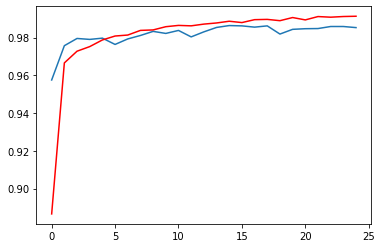

In [ ]:
dir(mnist_model.history)
plt.plot(mnist_model.history.history['val_accuracy'])
plt.plot(mnist_model.history.history['accuracy'],c='r')


In [ ]:
print('This model predicts '+str(mnist_model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 6s 19ms/step - loss: 0.1020 - accuracy: 0.9864
This model predicts 98.64000082015991% of the test data correctly


In [ ]:
#I will try normalizing the input data
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)


u=np.mean(x_train,axis=0)
dev=np.std(x_train,axis=0)

max(u),min(u),max(dev),min(dev)
x_train=(x_train-u)/(dev+1e-1)
x_test=(x_test-u)/(dev+1e-1)

x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

# max(np.mean((x_train-u)/(dev+1e-1),axis=0))
# np.min((x_train-u)/(dev+1e-1))
# dev

mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=25,validation_split=0.2,batch_size=200)


Epoch 1/25
240/240 [==============================] - 7s 26ms/step - loss: 0.1099 - accuracy: 0.9876 - val_loss: 0.1224 - val_accuracy: 0.9850
Epoch 2/25
240/240 [==============================] - 6s 25ms/step - loss: 0.0893 - accuracy: 0.9914 - val_loss: 0.1148 - val_accuracy: 0.9863
Epoch 3/25
240/240 [==============================] - 6s 26ms/step - loss: 0.0840 - accuracy: 0.9920 - val_loss: 0.1202 - val_accuracy: 0.9838
Epoch 4/25
240/240 [==============================] - 6s 25ms/step - loss: 0.0801 - accuracy: 0.9924 - val_loss: 0.1291 - val_accuracy: 0.9803
Epoch 5/25
240/240 [==============================] - 6s 25ms/step - loss: 0.0757 - accuracy: 0.9934 - val_loss: 0.1118 - val_accuracy: 0.9843
Epoch 6/25
240/240 [==============================] - 6s 25ms/step - loss: 0.0766 - accuracy: 0.9928 - val_loss: 0.1033 - val_accuracy: 0.9870
Epoch 7/25
240/240 [==============================] - 6s 25ms/step - loss: 0.0756 - accuracy: 0.9927 - val_loss: 0.1074 - val_accuracy: 0.9859

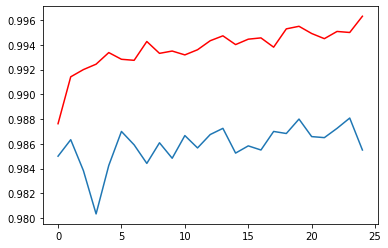

In [ ]:
dir(mnist_model.history)
plt.plot(mnist_model.history.history['val_accuracy'])
plt.plot(mnist_model.history.history['accuracy'],c='r')


In [ ]:
#Normalization helps so instead of just normalizing the input data I will try to normalize the outputs of dense layers 
#This possibly helps in maintaining the learning consistency across features; in this xcase pixels of the data 

mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        AveragePooling2D(pool_size=(2,2)),
                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])


mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 128)      0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                      

In [ ]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=200)

Epoch 1/20
240/240 [==============================] - 8s 30ms/step - loss: 1.3243 - accuracy: 0.9503 - val_loss: 2.2933 - val_accuracy: 0.1842
Epoch 2/20
240/240 [==============================] - 7s 29ms/step - loss: 0.3561 - accuracy: 0.9834 - val_loss: 0.8133 - val_accuracy: 0.8175
Epoch 3/20
240/240 [==============================] - 7s 29ms/step - loss: 0.2384 - accuracy: 0.9852 - val_loss: 0.2338 - val_accuracy: 0.9812
Epoch 4/20
240/240 [==============================] - 7s 29ms/step - loss: 0.1980 - accuracy: 0.9868 - val_loss: 0.1877 - val_accuracy: 0.9872
Epoch 5/20
240/240 [==============================] - 7s 29ms/step - loss: 0.1670 - accuracy: 0.9893 - val_loss: 0.1862 - val_accuracy: 0.9818
Epoch 6/20
240/240 [==============================] - 7s 29ms/step - loss: 0.1433 - accuracy: 0.9907 - val_loss: 0.1503 - val_accuracy: 0.9874
Epoch 7/20
240/240 [==============================] - 7s 28ms/step - loss: 0.1218 - accuracy: 0.9925 - val_loss: 0.1304 - val_accuracy: 0.9857

In [ ]:
mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        AveragePooling2D(pool_size=(2,2)),

                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        MaxPool2D(pool_size=(2,2)),

                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])


mnist_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 5, 5, 128)        512       
 hNormalization)                                                 
                                                      

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=200)

Epoch 1/20
240/240 [==============================] - 10s 38ms/step - loss: 0.6065 - accuracy: 0.9454 - val_loss: 1.8248 - val_accuracy: 0.4712
Epoch 2/20
240/240 [==============================] - 9s 37ms/step - loss: 0.2843 - accuracy: 0.9885 - val_loss: 0.4899 - val_accuracy: 0.9094
Epoch 3/20
240/240 [==============================] - 9s 36ms/step - loss: 0.1723 - accuracy: 0.9932 - val_loss: 0.1582 - val_accuracy: 0.9898
Epoch 4/20
240/240 [==============================] - 9s 37ms/step - loss: 0.1252 - accuracy: 0.9951 - val_loss: 0.1238 - val_accuracy: 0.9908
Epoch 5/20
240/240 [==============================] - 8s 34ms/step - loss: 0.0989 - accuracy: 0.9965 - val_loss: 0.1120 - val_accuracy: 0.9893
Epoch 6/20
240/240 [==============================] - 9s 37ms/step - loss: 0.0799 - accuracy: 0.9979 - val_loss: 0.0929 - val_accuracy: 0.9912
Epoch 7/20
240/240 [==============================] - 9s 37ms/step - loss: 0.0666 - accuracy: 0.9986 - val_loss: 0.0823 - val_accuracy: 0.990

In [ ]:
#Instead of faeture selection based regularizers I intend to use feature shrinkage based l2 regularizer in penultimate dense layers
mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        AveragePooling2D(pool_size=(2,2)),

                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        MaxPool2D(pool_size=(2,2)),

                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])


mnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 5, 5, 128)        512       
 hNormalization)                                                 
                                                      

In [ ]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=200)

Epoch 1/20
240/240 [==============================] - 10s 38ms/step - loss: 0.5521 - accuracy: 0.9436 - val_loss: 2.9035 - val_accuracy: 0.2867
Epoch 2/20
240/240 [==============================] - 8s 35ms/step - loss: 0.2291 - accuracy: 0.9883 - val_loss: 0.4617 - val_accuracy: 0.9030
Epoch 3/20
240/240 [==============================] - 8s 35ms/step - loss: 0.1241 - accuracy: 0.9933 - val_loss: 0.1148 - val_accuracy: 0.9894
Epoch 4/20
240/240 [==============================] - 8s 35ms/step - loss: 0.0832 - accuracy: 0.9948 - val_loss: 0.1027 - val_accuracy: 0.9865
Epoch 5/20
240/240 [==============================] - 9s 37ms/step - loss: 0.0651 - accuracy: 0.9967 - val_loss: 0.0830 - val_accuracy: 0.9891
Epoch 6/20
240/240 [==============================] - 9s 37ms/step - loss: 0.0536 - accuracy: 0.9977 - val_loss: 0.0742 - val_accuracy: 0.9897
Epoch 7/20
240/240 [==============================] - 8s 34ms/step - loss: 0.0450 - accuracy: 0.9984 - val_loss: 0.0772 - val_accuracy: 0.987

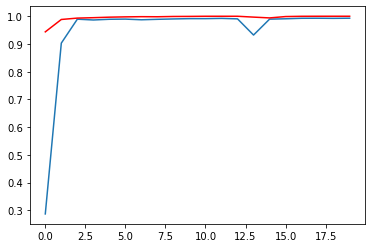

In [ ]:
dir(mnist_model.history)
plt.plot(mnist_model.history.history['val_accuracy'])
plt.plot(mnist_model.history.history['accuracy'],c='r')


# FINAL SELECTED MODEL

In [ ]:
mnist_model=Sequential([
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        AveragePooling2D(pool_size=(2,2)),

                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        MaxPool2D(pool_size=(2,2)),

                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])


mnist_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 5, 5, 128)        512       
 hNormalization)                                                 
                                                      

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


mnist_model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=200)

Epoch 1/20
240/240 [==============================] - 10s 38ms/step - loss: 0.6059 - accuracy: 0.9448 - val_loss: 2.9857 - val_accuracy: 0.2992
Epoch 2/20
240/240 [==============================] - 9s 37ms/step - loss: 0.2848 - accuracy: 0.9896 - val_loss: 0.6446 - val_accuracy: 0.8409
Epoch 3/20
240/240 [==============================] - 9s 37ms/step - loss: 0.1710 - accuracy: 0.9931 - val_loss: 0.1683 - val_accuracy: 0.9858
Epoch 4/20
240/240 [==============================] - 9s 37ms/step - loss: 0.1237 - accuracy: 0.9951 - val_loss: 0.1250 - val_accuracy: 0.9893
Epoch 5/20
240/240 [==============================] - 9s 37ms/step - loss: 0.0969 - accuracy: 0.9963 - val_loss: 0.1056 - val_accuracy: 0.9891
Epoch 6/20
240/240 [==============================] - 8s 34ms/step - loss: 0.0769 - accuracy: 0.9979 - val_loss: 0.0966 - val_accuracy: 0.9883
Epoch 7/20
240/240 [==============================] - 9s 37ms/step - loss: 0.0624 - accuracy: 0.9987 - val_loss: 0.0809 - val_accuracy: 0.990

# Fitting this model architecture on the entire training data

In [ ]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mnist_model.fit(x_train,y_train,epochs=20,validation_split=0.0,batch_size=200)

Epoch 1/20
300/300 [==============================] - 10s 32ms/step - loss: 0.0288 - accuracy: 0.9972
Epoch 2/20
300/300 [==============================] - 9s 31ms/step - loss: 0.0225 - accuracy: 0.9989
Epoch 3/20
300/300 [==============================] - 10s 32ms/step - loss: 0.0197 - accuracy: 0.9997
Epoch 4/20
300/300 [==============================] - 9s 32ms/step - loss: 0.0180 - accuracy: 0.9998
Epoch 5/20
300/300 [==============================] - 10s 32ms/step - loss: 0.0164 - accuracy: 0.9999
Epoch 6/20
300/300 [==============================] - 9s 31ms/step - loss: 0.0157 - accuracy: 0.9999
Epoch 7/20
300/300 [==============================] - 9s 31ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 8/20
300/300 [==============================] - 9s 31ms/step - loss: 0.0144 - accuracy: 0.9999
Epoch 9/20
300/300 [==============================] - 9s 31ms/step - loss: 0.0333 - accuracy: 0.9948
Epoch 10/20
300/300 [==============================] - 9s 31ms/step - loss: 0.0228 - acc

In [ ]:
print('This model predicts '+str(mnist_model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

y_pred=mnist_model.predict(x_test)
y_pred_class=np.argmax(y_pred,axis=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0329 - accuracy: 0.9934
This model predicts 99.3399977684021% of the test data correctly


In [ ]:
# y_test[y_test!=y_pred_class]
misclassified_idx=np.array(np.where(y_test!=y_pred_class)).reshape(-1,)
y_test[misclassified_idx]

array([4, 6, 4, 3, 3, 8, 3, 8, 1, 6, 3, 7, 9, 4, 9, 5, 3, 9, 7, 2, 7, 4,
       1, 9, 3, 4, 2, 5, 6, 3, 8, 3, 3, 1, 7, 6, 5, 9, 2, 1, 8, 6, 3, 6,
       9, 4, 9, 5, 3, 9, 9, 9, 7, 0, 8, 0, 1, 3, 7, 8, 7, 9, 9, 2, 9, 5],
      dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report 

cr=classification_report(y_test,y_pred_class)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import seaborn as sns
import pandas as pd
df_pred=pd.DataFrame({
    'y_true':y_test,
    'y_pred':y_pred_class,
    'instance':np.arange(y_test.shape[0])
})
df_acc=df_pred.groupby(['y_true','y_pred'])['instance'].count().unstack().fillna(0)


plt.figure(figsize=(20,8))
# sns.heatmap(df_acc.round(0),annot=True)
df_acc.loc[:,'most_common_misclassification']=df_acc.apply(lambda s: (s[s.index!=s.name]).idxmax(),axis=1 )
df_acc

y_pred,0,1,2,3,4,5,6,7,8,9,most_common_misclassification
y_true,,,,,,,,,,,
0,978.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,1.0,1130.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,1.0,0.0,1028.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7
3,0.0,0.0,2.0,998.0,0.0,7.0,0.0,2.0,1.0,0.0,5
4,0.0,0.0,1.0,0.0,976.0,0.0,0.0,0.0,0.0,5.0,9
5,1.0,0.0,0.0,2.0,0.0,887.0,1.0,1.0,0.0,0.0,3
6,3.0,1.0,0.0,0.0,0.0,2.0,952.0,0.0,0.0,0.0,0
7,0.0,2.0,5.0,0.0,0.0,0.0,0.0,1021.0,0.0,0.0,2
8,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,968.0,1.0,2


<Figure size 1440x576 with 0 Axes>

Most of the times the model was able to predict the x_test images accuractely however there are some pairs of images like 9,4 and 3,5 that the model confuses to determne precisely.

The rounded precision for some of the digits is one whereas rounded recall for some of the digits are even one.
This states that t6he model is able to demarcate appreciably well between different classes of images.

It is easily able to work on the pixel features to determine the true labels.


However there are couples instances whose feature boundaries possibly generate similar convolved maps and hence are difficult to be detremined by the model.





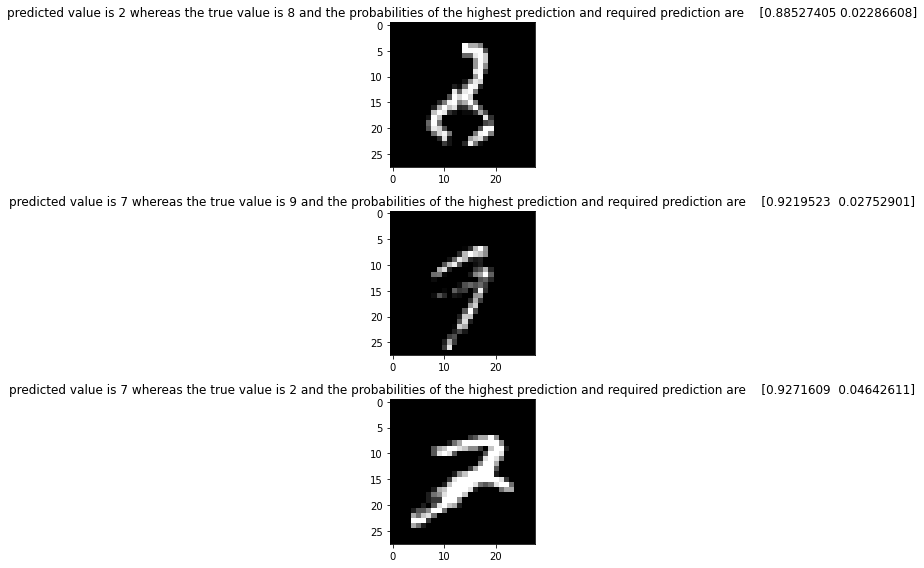

In [ ]:
samples=3
lt_samples=np.random.choice(misclassified_idx,samples)

f,ax=plt.subplots(samples,1,figsize=(20,8))
# ax=ax.ravel()

for i,img_idx in enumerate(lt_samples):
  ax[i].imshow(x_test[img_idx,...].reshape(28,28),cmap='gray')
  ax[i].set_title(f'predicted value is {y_pred_class[img_idx]} whereas the true value is {y_test[img_idx]} and the probabilities of the highest prediction and required prediction are\
    {y_pred[img_idx,[y_pred_class[img_idx],y_test[img_idx]]]}')
  

f.tight_layout()





In [ ]:
from collections import defaultdict
dt_pairs=defaultdict(int)
dt_pairs_commutative=defaultdict(int)
# (2,1) in ((1,2),(2,1))
for idx in misclassified_idx:
  true_label=y_test[idx]
  pred_label=y_pred_class[idx]
  pr=(true_label,pred_label)

  dt_pairs[pr]+=1
  if true_label>=pred_label:
    pr_com=(true_label,pred_label)
  else:
    pr_com=(pred_label,true_label)

  dt_pairs_commutative[pr_com]+=1

sorted(dt_pairs.items(), key=lambda s : s[1],reverse=True)[:5]

[((3, 5), 7), ((4, 9), 5), ((7, 2), 5), ((9, 4), 5), ((9, 7), 4)]

In [ ]:
sorted(dt_pairs_commutative.items(), key=lambda s : s[1],reverse=True)[:5]

[((9, 4), 10), ((5, 3), 9), ((7, 2), 8), ((9, 7), 4), ((6, 0), 3)]

The features, like edge, cross etc that help detremine the patterns in digits are at times repeated across multiple digits.
Therefore at time it turns hard to recognise the patterns in the digit that has been provided for training purposes.
The  digits are hard to be discerned even with bare human eyes.

Some common pairs that have similar pixel representation are (2,7), (9,4),(5,3)
A slight change or shift in the pixel representation of any of the imange will lead to misclassification by the model that is trained to detect a  detreministic shit map of pre-trained features

One solution for this is to increase the number of pixels on which the data is generated, following increase number of small convolution maps to detect any slightest of edge, shift etc based peculiarity of the image.

This effort can be augmneted with preprocessing filtering plus pre processing noising of data where we add shifts,edges and delta pixel changes to our true raw images and train them with the know right labels.

This will help the model determine those changes and learn accordingly 

100 perecent accuracy can be attained when there is ceratininty that there is sync between the image label and the image representation. 
If someones generates an image that has more resemblance with 4 and label it as 7 then no model can ever attain tottal accuracy.

Some noise based features can be removed or dealt with but it is hard to deal with bias human errors.


## Kaggle Challenge
# ROUGH WORK

In [ ]:
# misclassified_idx.shape
# tt=df_acc.iloc[0,:]

# tt[tt.index!=tt.name]



In [1]:
#Attempt on Kaggle dataste

!unzip train.csv
!unzip test.csv

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [85]:
from numpy import genfromtxt
xx = genfromtxt('train.csv', delimiter=',')
x_test=genfromtxt('test.csv', delimiter=',')

In [86]:
x_test=x_test[1:,...]
xx=xx[1:,...]

In [87]:
x_train=xx[:,1:]
y_train=xx[:,0]

x_train=x_train/255
x_test/255


x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
# x_test.shape

In [92]:
from tensorflow.keras import layers
# layers.RandomFlip("horizontal_and_vertical"),

augmentation_layer=Sequential([
  layers.RandomTranslation(height_factor=0.1,width_factor=0.051),
  layers.RandomRotation(0.051),
])

(42000, 28, 28, 1)

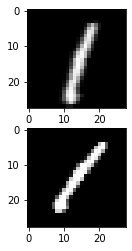

In [54]:
import matplotlib.pyplot as plt
ii=0
# augmentation_layer(x_train[ii]).numpy().reshape(28,28,1)

f,ax=plt.subplots(2,1)

ax[0].imshow(augmentation_layer(x_train[ii]).numpy().reshape(28,28),cmap='gray')
ax[1].imshow(x_train[ii].reshape(28,28),cmap='gray')







In [88]:
# temp=np.arange(12).reshape(3,2,2)  




# def augment_img(a):
#   a=a.reshape(28,28,1)
#   aug_a=augmentation_layer(a).numpy()
#   return aug_a.reshape(28*28)


# x_train=x_train.reshape(-1,28*28)
# np.apply_along_axis(augment_img,1,x_train)
# # for i in range(2):
# #   temp=np.apply_along_axis(augment_img,1,x_train)
# #   if i==0:
# #     temp_train=temp
# #   else:
# #     temp_train=np.concatenate([temp_train,temp],axis=0)


# # np.apply_over_axes(func=augment_img,a=temp_train,axes=(1,2))
# # vec_fn=np.vectorize(augment_img)

# # vec_fn(temp_train)

# # np.apply
# # temp_train=x_train[:10,...]

# # temp_train=temp_train.reshape(-1,28*28)

# # np.apply_along_axis(augment_img,1,temp_train).shape

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_train.shape,y_train.shape

In [60]:
np.concatenate([x_train,augmentation_layer(x_train[ii]).numpy().reshape(1,28,28,1)],
               axis=0).shape
np.concatenate([y_train,[0]*10]).shape

#I will try to append 5 augmnetations of each image



(42010,)

In [97]:
xshape = x_train.shape[1:]

mnist_model=Sequential([augmentation_layer,
                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        AveragePooling2D(pool_size=(2,2)),

                        Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),
                               input_shape=xshape,activation='relu'),
                        MaxPool2D(pool_size=(2,2)),

                        BatchNormalization(),
                        Conv2D(filters=64,kernel_size=(3,3),strides=(1,1)),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        BatchNormalization(),
                        Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
                        Dense(32,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
                        Dense(10,activation=tf.nn.softmax)                                              
                        
])


# mnist_model.summary()

In [98]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mnist_model.fit(x_train,y_train,epochs=3*20,validation_split=0.2,batch_size=200)

Epoch 1/60
168/168 [==============================] - 4s 17ms/step - loss: 0.8159 - accuracy: 0.8870 - val_loss: 4.8149 - val_accuracy: 0.1050
Epoch 2/60
168/168 [==============================] - 3s 16ms/step - loss: 0.4130 - accuracy: 0.9743 - val_loss: 2.3310 - val_accuracy: 0.3665
Epoch 3/60
168/168 [==============================] - 3s 16ms/step - loss: 0.2990 - accuracy: 0.9806 - val_loss: 0.4826 - val_accuracy: 0.9160
Epoch 4/60
168/168 [==============================] - 3s 16ms/step - loss: 0.2232 - accuracy: 0.9847 - val_loss: 0.2412 - val_accuracy: 0.9719
Epoch 5/60
168/168 [==============================] - 3s 16ms/step - loss: 0.1812 - accuracy: 0.9857 - val_loss: 0.1552 - val_accuracy: 0.9890
Epoch 6/60
168/168 [==============================] - 3s 16ms/step - loss: 0.1545 - accuracy: 0.9875 - val_loss: 0.1329 - val_accuracy: 0.9912
Epoch 7/60
168/168 [==============================] - 3s 16ms/step - loss: 0.1365 - accuracy: 0.9878 - val_loss: 0.1328 - val_accuracy: 0.9864

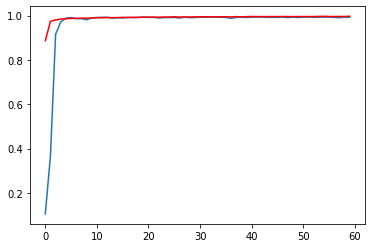

In [99]:
plt.plot(mnist_model.history.history['val_accuracy'])
plt.plot(mnist_model.history.history['accuracy'],c='r')


In [100]:
y_pred_probs=mnist_model.predict(x_test)

y_pred=np.argmax(y_pred_probs,axis=1)



In [101]:
import pandas as pd
df=pd.DataFrame({'ImageId':np.arange(1,y_pred.shape[0]+1),
                 'Label':y_pred})

df.to_csv('submission.csv',index=False)

In [102]:
pd.read_csv('submission.csv')

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,1
